In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import imblearn
import sys
import numpy as np
import seaborn as sns
import sklearn

In [131]:
X = pd.read_csv('1_Telcom-Churn.csv').drop(columns=['customerID'])

X['Churn'] = np.where(X.Churn == 'Yes',1,0)

print(X)

      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL             No          Yes   
1      

In [112]:
binary_columns = [
    'gender','Partner','Dependents','PhoneService','MultipleLines',
    'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
    'TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod'
]

In [113]:
# for column in binary_columns:
#     X[column] = (X[column] == 'Yes').astype('int')
df_dummy = pd.get_dummies(X, columns=binary_columns)
N = X.copy()
print(N)

      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL             No          Yes   
1      

In [133]:
df_dummy['TotalCharges'] = pd.to_numeric(df_dummy['TotalCharges'],errors='coerce')
df_dummy = df_dummy.dropna(how = "any", axis = 0)

In [134]:
print(df_dummy)

      SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn  \
0                 0       1           29.85         29.85      0   
1                 0      34           56.95       1889.50      0   
2                 0       2           53.85        108.15      1   
3                 0      45           42.30       1840.75      0   
4                 0       2           70.70        151.65      1   
...             ...     ...             ...           ...    ...   
7038              0      24           84.80       1990.50      0   
7039              0      72          103.20       7362.90      0   
7040              0      11           29.60        346.45      0   
7041              1       4           74.40        306.60      1   
7042              0      66          105.65       6844.50      0   

      gender_Female  gender_Male  Partner_No  Partner_Yes  Dependents_No  ...  \
0                 1            0           0            1              1  ...   
1                 0  

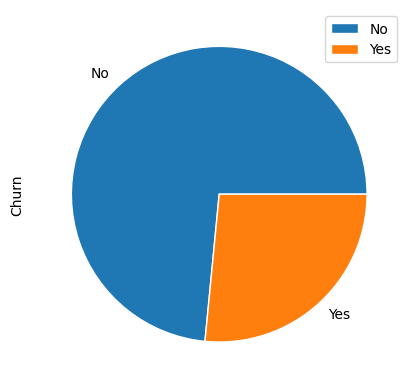

In [135]:
# Y = X.pop('Churn')
y_distribution = Y.groupby(Y).count()
y_distribution.plot(kind='pie',wedgeprops={'edgecolor':'w'})
plt.legend(['No','Yes'])

In [136]:
y_ratio = (y_distribution[0]) / (y_distribution[1])
print(f'Ratio (No / Yes): {y_ratio}')

Ratio (No / Yes): 2.7683253076511503


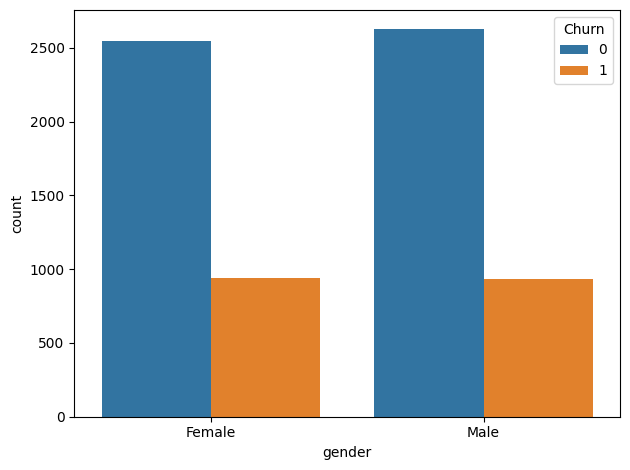

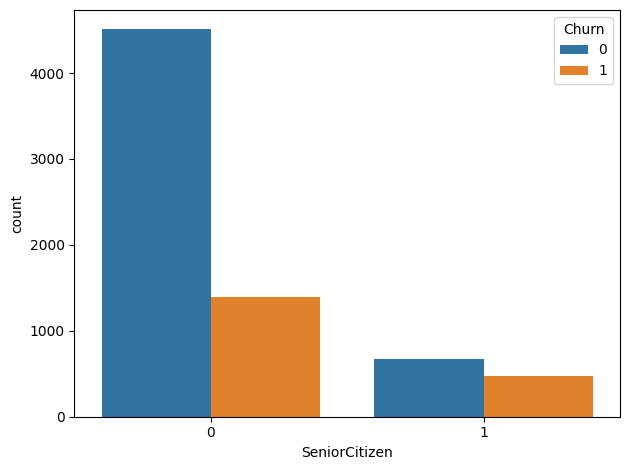

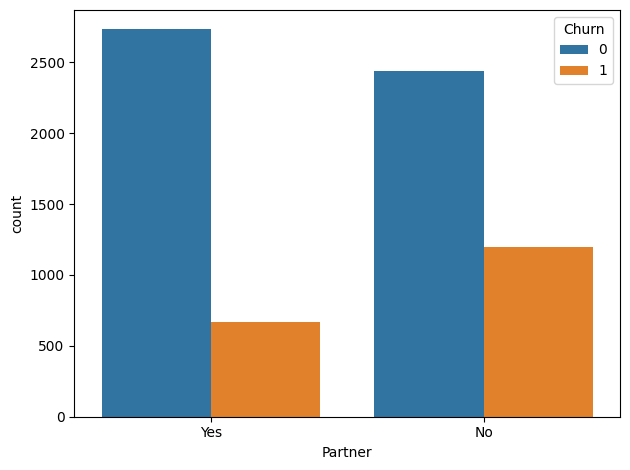

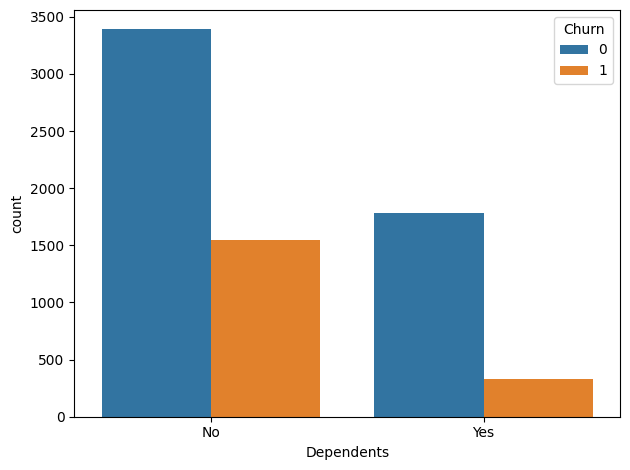

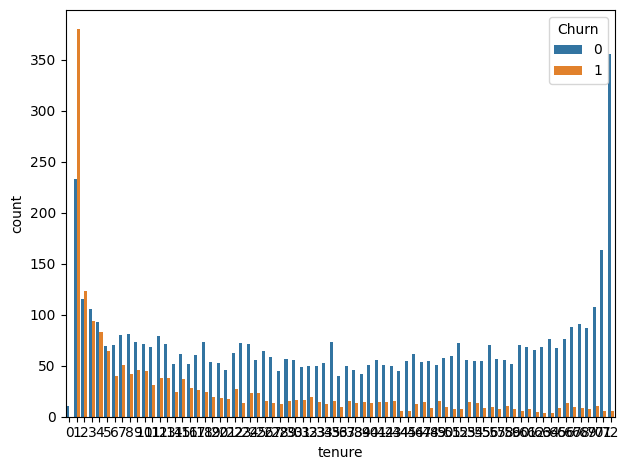

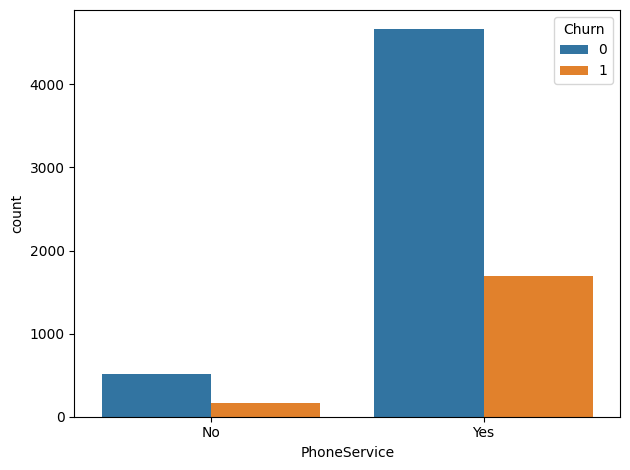

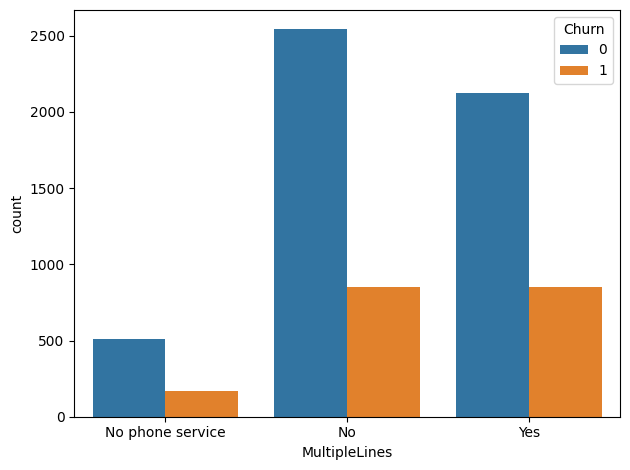

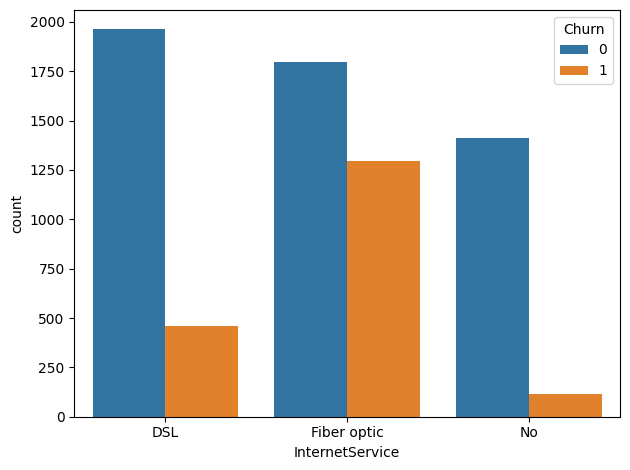

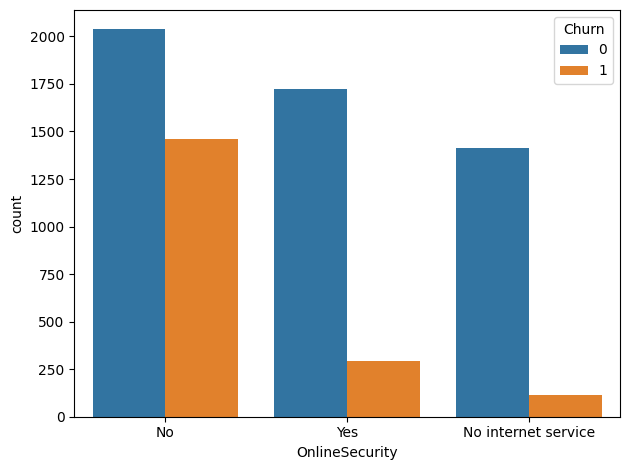

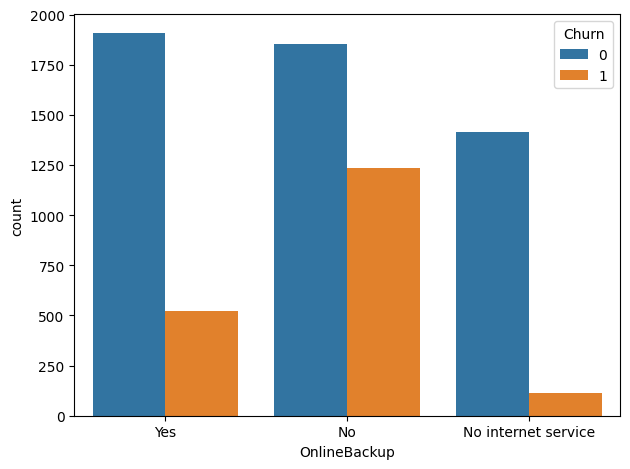

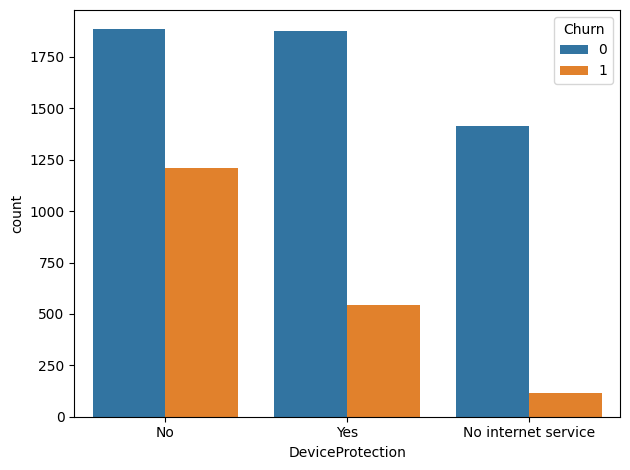

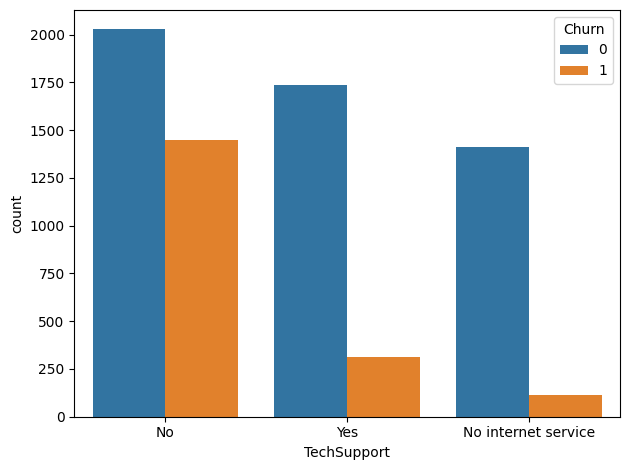

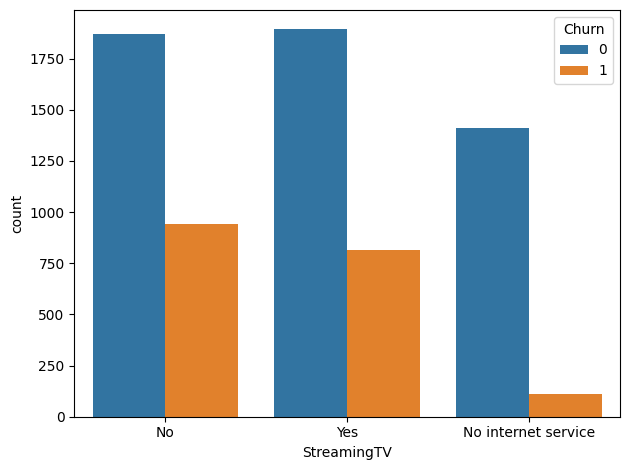

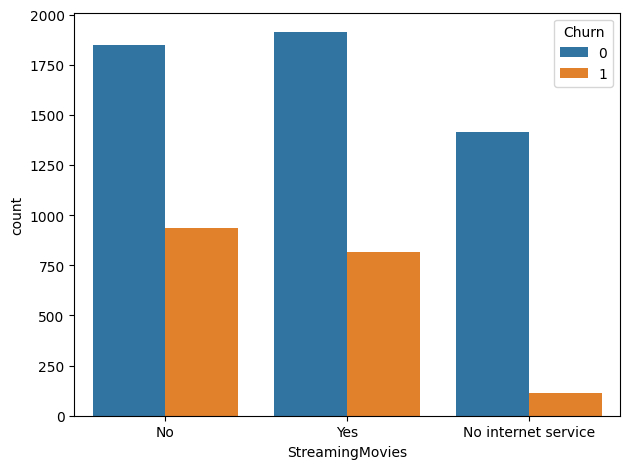

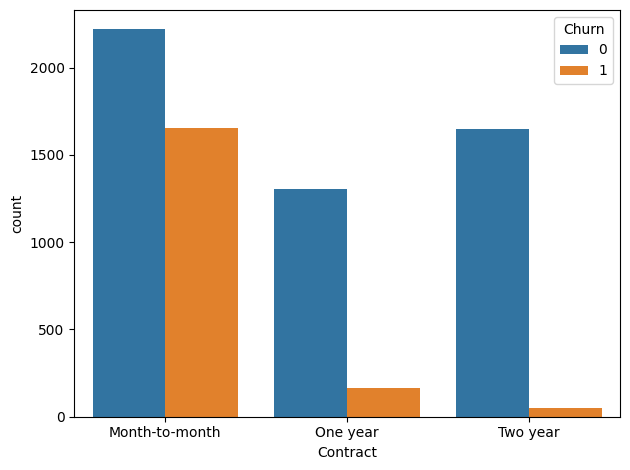

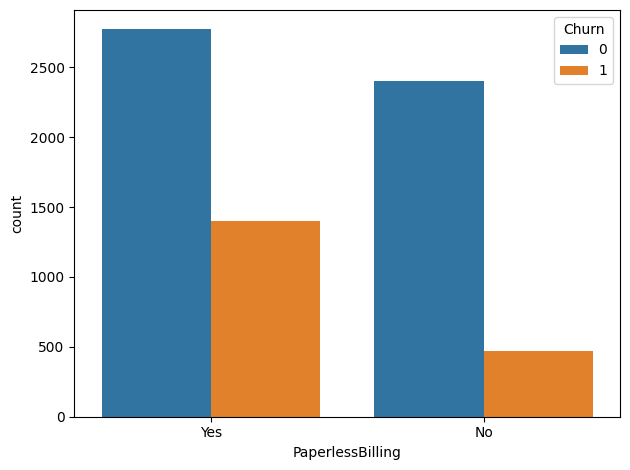

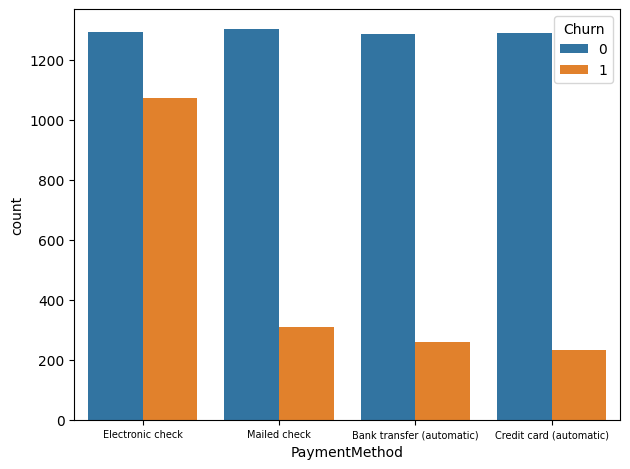

In [137]:
# plotting and checking for data dependecy of churn.
for i, predictor in enumerate(N.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    ax = sns.countplot(data =N, x = predictor, hue='Churn')
    if predictor == "PaymentMethod": 
        ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
        plt.tight_layout()
        plt.show()
    else:
        plt.tight_layout()
        plt.show()



<AxesSubplot: >

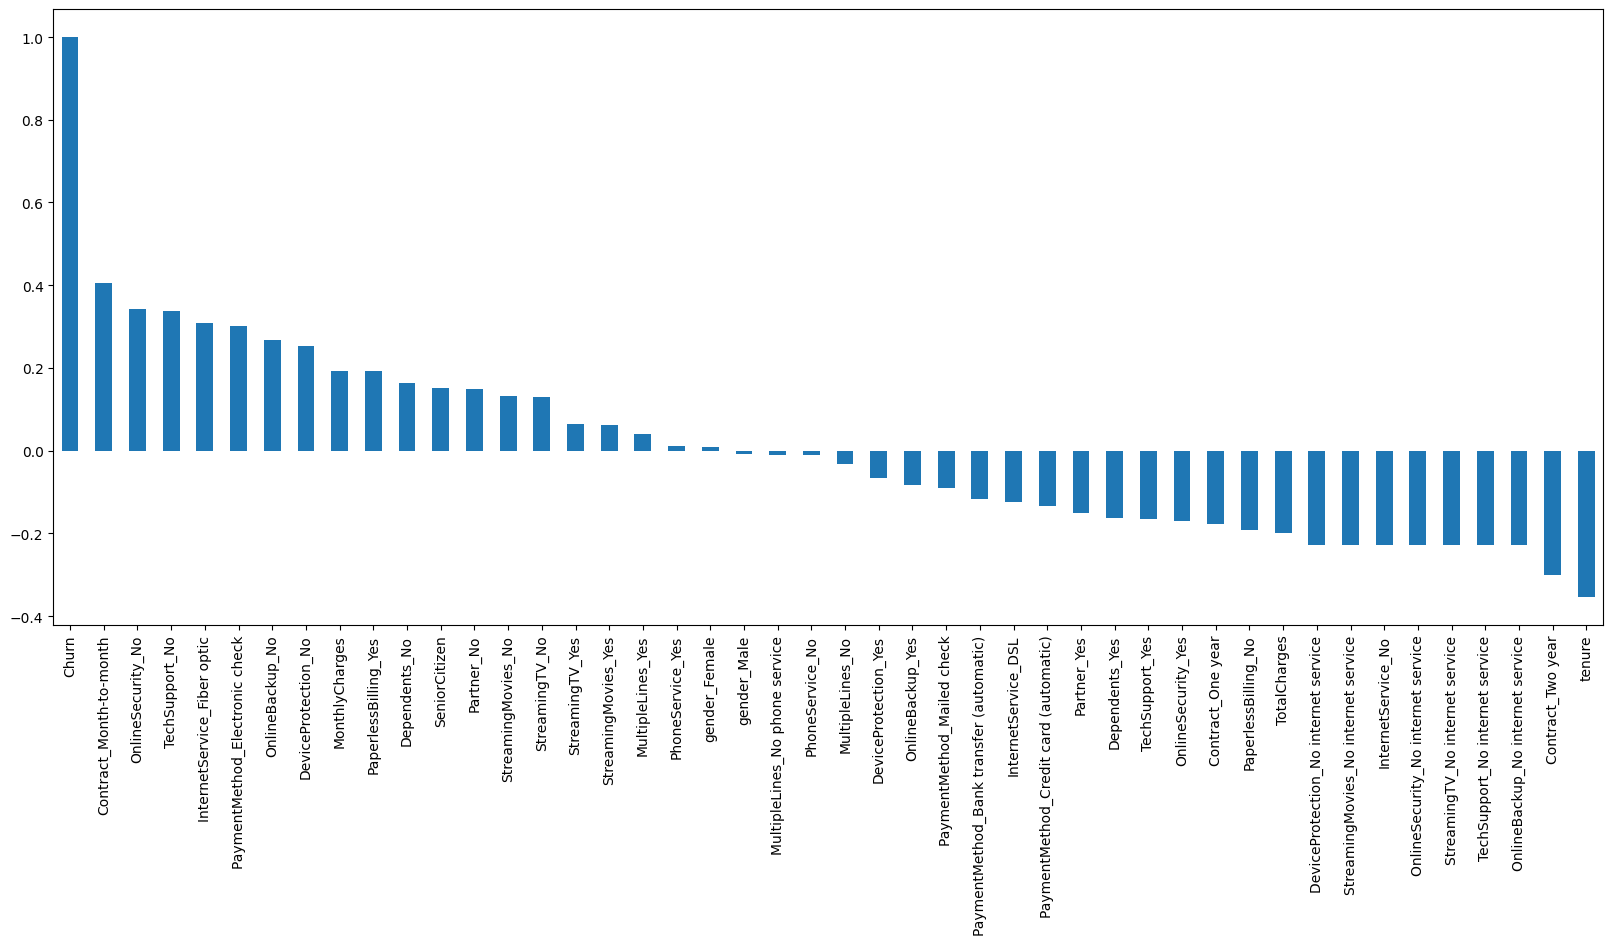

In [138]:
plt.figure(figsize=(20,8))
df_dummy.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [139]:
print(df_dummy.isnull().sum())
x = df_dummy.drop('Churn', axis = 1)
# print(df_dummy.value_counts("Churn"))
y = df_dummy['Churn']

SeniorCitizen                              0
tenure                                     0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
gender_Female                              0
gender_Male                                0
Partner_No                                 0
Partner_Yes                                0
Dependents_No                              0
Dependents_Yes                             0
PhoneService_No                            0
PhoneService_Yes                           0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecurity_Yes                         0
OnlineBack

In [140]:
smote = imblearn.over_sampling.SMOTE(random_state = 0)
x_resampled_smote, y_resampled_smote = smote.fit_resample(x, y)
y_resampled_smote.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [ ]:
def classification_def(x, y, plots = True):

    x_train,x_test,y_train,y_test = sklearn.model_selection.train_test_split(x, y,test_size = 0.2)
    scores = ['With Churn', 'Without Churn']
    #Decision tree
    model_dt = sklearn.tree.DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth = 6, min_samples_leaf = 8)
    model_dt.fit(x_train, y_train)
    y_pred = model_dt.predict(x_test)
    accuracy_dt = sklearn.metrics.accuracy_score(y_test, y_pred, normalize=True)
    f1_dt = sklearn.metrics.f1_score(y_test, y_pred, average='binary')
    roc_dt = sklearn.metrics.roc_auc_score(y_test, y_pred, average='macro') 
    #===== Random Forest Classifier =========================
    model_rf=sklearn.ensemble.RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100, max_depth=6, min_samples_leaf=8)
    model_rf.fit(x_train,y_train)
    y_pred=model_rf.predict(x_test)
    accuracy_rf = sklearn.metrics.accuracy_score(y_test, y_pred, normalize=True)
    f1_rf = sklearn.metrics.f1_score(y_test, y_pred, average='binary')
    roc_rf = sklearn.metrics.roc_auc_score(y_test, y_pred, average='macro')
    #===== Logistic Regression =========================
    model_lr= sklearn.linear_model.LogisticRegression(random_state=100)
    model_lr.fit(x_train, y_train)
    y_pred=model_lr.predict(x_test)
    accuracy_lr = sklearn.metrics.accuracy_score(y_test, y_pred, normalize=True)
    f1_lr = sklearn.metrics.f1_score(y_test, y_pred, average='binary')
    roc_lr = sklearn.metrics.roc_auc_score(y_test, y_pred, average='macro')
    #===== KNN =========================================
    model_knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=7).fit(x_train, y_train)
    y_pred = model_knn.predict(x_test)
    accuracy_knn = sklearn.metrics.accuracy_score(y_test, y_pred, normalize=True)
    f1_knn = sklearn.metrics.f1_score(y_test, y_pred, average='binary')
    roc_knn = sklearn.metrics.roc_auc_score(y_test, y_pred, average='macro')
    #===== SVM =========================================
    model_svm = sklearn.svm.SVC(kernel='linear')
    model_svm.fit(x_train, y_train)
    y_pred = model_svm.predict(x_test)
    accuracy_svm = sklearn.metrics.accuracy_score(y_test, y_pred, normalize=True)
    f1_svm = sklearn.metrics.f1_score(y_test, y_pred, average='binary')
    roc_svm = sklearn.metrics.roc_auc_score(y_test, y_pred, average='macro')
     #===== MLP =========================================
    model_mlp = sklearn.neural_network.MLPClassifier(hidden_layer_sizes = (42,2), max_iter = 10000)
    model_mlp.fit(x_train, y_train)
    y_pred = model_mlp.predict(x_test)
    accuracy_mlp = sklearn.metrics.accuracy_score(y_test, y_pred, normalize=True)
    f1_mlp = sklearn.metrics.f1_score(y_test, y_pred, average='binary')
    roc_mlp = sklearn.metrics.roc_auc_score(y_test, y_pred, average='macro')
    classification_metrics_accuracy = [accuracy_dt, accuracy_rf, accuracy_lr, accuracy_knn, accuracy_svm, accuracy_mlp]

    classification_metrics_f1 = [f1_dt, f1_rf, f1_lr, f1_knn, f1_svm, f1_mlp]

    classification_metrics_roc =  [roc_dt, roc_rf, roc_lr, roc_knn, roc_svm, roc_mlp]


    return classification_metrics_accuracy, classification_metrics_f1, classification_metrics_roc


In [ ]:
classification_metrics_accuracy, classification_metrics_f1, classification_metrics_roc = classification_def(x_resampled_smote, y_resampled_smote, plots = True)

In [ ]:
scores_df = pd.DataFrame(index=['Decision Tree', 'Random Forest', 'Logistic Regression', 'KNN', 'SVM', 'MLP'], 
columns=['Accuracy', 'F1', 'ROC_AUC'])

scores_df['Accuracy'] = classification_metrics_accuracy
scores_df['F1'] = classification_metrics_f1
scores_df['ROC_AUC'] = classification_metrics_roc

scores_df.style.highlight_max(color = 'green')